In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [21]:
data=pd.read_csv('../input/creditcardfraud/creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [22]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [23]:
data.shape

(284807, 31)

There are 30 independent variables,time,amount,V1-V28 and one dependent variable Class.
The highest value in amount is Rs. 284807. Also, there are no missing values.

In [24]:
Fraud=data[data['Class']==1]
Valid=data[data['Class']==0]
fraction=len(Fraud)/(len(Fraud)+len(Valid))
print(len(Valid))
print(len(Fraud))
print(fraction)


284315
492
0.001727485630620034


The dataset is highly imbalanced ,only 0.17% transactions are fraudelent. First let's try to make predictions on this unbalanced data.

In [25]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [26]:
Valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We can clearly see that mean amount for fraudelent transactions is high.

In [27]:
Fraud.Time.describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [28]:
Valid.Time.describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [29]:
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
np.random.seed(2)

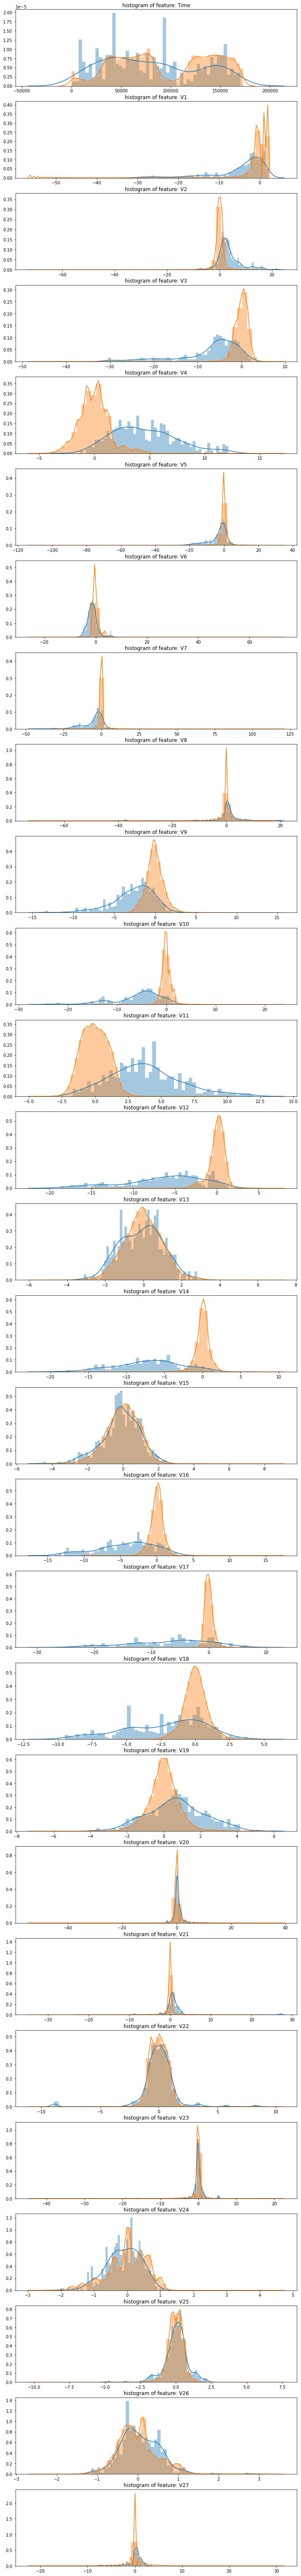

In [30]:
# Data visualization
from matplotlib import gridspec
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=50)
    sns.distplot(data[c][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

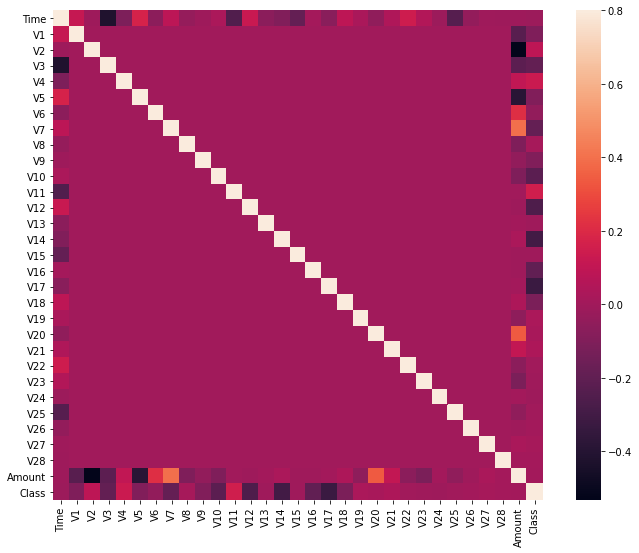

In [31]:
#Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [32]:
#skewness
skew_ = data.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that have either a positive or a negative correlation with each other. 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(data[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [34]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(data[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [35]:
#concatenating newly created columns w original df
data = pd.concat([data, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
data.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
225184  144140.0 -0.581460  0.950267  0.115938 -1.384767  1.388364 -1.595678   
116637   74369.0  0.686730 -0.785586  0.945092  1.476634 -1.191074 -0.193185   
99414    67107.0 -0.848395  1.214313  0.954869 -0.030145 -0.177527 -0.851855   
217619  140965.0 -1.104465  0.616952 -0.878973 -0.312839 -0.092112 -0.020623   
279878  169155.0  2.061985 -0.114758 -1.079406  0.427062 -0.229701 -1.241109   

              V7        V8        V9  ...       V23       V24       V25  \
225184  2.120867 -0.718954 -0.205211  ... -0.514192  0.077220  0.736220   
116637 -0.217963 -0.011827  0.727172  ... -0.314303  0.427369  0.426733   
99414   0.444232  0.369063 -1.005181  ... -0.064845  0.590082 -0.271787   
217619  1.422463  0.442278 -0.406603  ...  0.413781  0.649776 -0.082746   
279878  0.121975 -0.283331  0.679923  ...  0.352777  0.021161 -0.330437   

             V26       V27       V28  Amount  Class  scaled_amount  \
225184 -0.302469 -0.254862 -0.126279   12.82      0      -0.301974   
116637 -0.285560  0.022906  0.079838  256.39      0       0.671840   
99414   0.276440  0.217840  0.127724   16.44      0      -0.287501   
217619  0.520578  0.151103  0.216899  270.00      0       0.726254   
279878  0.198512 -0.076625 -0.061905    1.29      0      -0.348072   

        scaled_time  
225184     1.038706  
116637    -0.430526  
99414     -0.583449  
217619     0.971847  
279878     1.565470  

[5 rows x 33 columns]

In [36]:
data.drop(['Amount', 'Time'], axis=1, inplace=True)

In [37]:
#Splitting the data into training and test sets
#manual train test split using numpy's random.rand
mask = np.random.rand(len(data)) < 0.9
train = data[mask]
test = data[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256388, 31)
Test Shape: (28419, 31)


In [38]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [39]:
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 446 fraudulent transactions in the train data.


In [40]:
#randomly selecting 431 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [41]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1        V2        V3        V4        V5        V6        V7  \
254966  1.303537 -2.293492  0.388874  1.094667 -1.353050  2.789243 -1.847654   
149792 -0.325435  0.346392 -0.603176 -2.778505  0.476289  0.408954  0.577338   
238541 -0.281890 -0.039618 -0.759138 -1.985531  1.240182 -1.308066  0.980647   
175490 -1.032543  0.063001  1.192566 -1.204726 -0.639334  0.297201 -0.218226   
248090  0.013344  0.736446  0.164462 -0.764822  0.562481 -0.644299  0.842407   

              V8        V9       V10  ...       V22       V23       V24  \
254966  0.870793  1.387227  0.364999  ...  0.468299  0.087139 -0.363639   
149792 -0.817389 -1.261632  0.351342  ...  1.232631 -0.183099 -0.316819   
238541 -0.275082 -1.953747  0.382721  ...  1.567972 -0.443512  0.819854   
175490  0.333627 -0.893387  0.346153  ...  0.391849  0.055855  0.728176   
248090  0.004867 -0.164380 -0.218048  ... -0.581770  0.030476 -0.364122   

             V25       V26       V27       V28  Class  scaled_amount  \
254966 -0.555919 -0.432232  0.155091  0.028277      0       0.766235   
149792 -0.193618 -0.109221  0.478781  0.231643      0       0.025789   
238541  0.505363  0.204709  0.028001  0.124681      0      -0.273268   
175490 -0.146694 -0.240989 -0.287961 -0.205939      0      -0.135614   
248090 -0.502079  0.143224  0.237279  0.082636      0      -0.338996   

        scaled_time  
254966     1.613966  
149792     0.489010  
238541     1.408209  
175490     0.758699  
248090     1.512067  

[5 rows x 31 columns]

In [42]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsample = pd.concat([selected, fraud])
len(subsample)

892

In [43]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1         V2         V3        V4         V5        V6         V7  \
0  -4.666500  -3.952320   0.206094  5.153525   5.229469  0.939040  -0.635033   
1  -4.673231   4.195976  -8.392423  7.743215  -1.138803 -2.094899  -3.839487   
2   1.081234   0.416414   0.862919  2.520863  -0.005021  0.563341  -0.123372   
3  -0.433222   2.428379  -3.996454  4.871299  -1.796308 -0.586868  -4.654543   
4  -1.585505   3.261585  -4.137422  2.357096  -1.405043 -1.879437  -3.513687   
5   1.878230   1.325630  -2.333469  4.233151   1.355184 -0.853508   0.716025   
6  -1.715228   1.476880   1.150552  2.427501   0.045801  1.032506   0.391818   
7  -1.863756   3.442644  -4.468260  2.805336  -2.118412 -2.332285  -4.261237   
8   1.917827   0.951967  -2.059206  3.833998   1.668192  0.769826   0.232463   
9 -26.457745  16.497472 -30.177317  8.904157 -17.892600 -1.227904 -31.197329   

          V8        V9        V10  ...       V22       V23       V24  \
0  -0.704506 -0.234786   4.031435  ...  1.821422  0.113563 -0.759673   
1   0.543053 -1.528448  -2.325113  ...  0.656076  0.482417 -0.624399   
2   0.223122 -0.673598   0.644550  ... -0.305154  0.053620  0.011761   
3   1.285230 -2.743539  -5.638941  ... -0.408954 -0.320890 -0.804230   
4   1.515607 -1.207166  -6.234561  ... -0.546869 -0.076584 -0.425550   
5  -0.164910 -1.502345   0.259411  ... -0.360736  0.043414 -0.242380   
6   0.538053 -1.064795   0.854472  ...  0.476681 -0.003271 -0.832590   
7   1.701682 -1.439396  -6.999907  ... -0.516242 -0.012218  0.070614   
8   0.107941 -1.143646   0.541699  ...  0.239994 -0.111916 -0.380576   
9 -11.438920 -9.462573 -22.187089  ...  3.460893  0.896538  0.254836   

        V25       V26       V27       V28  Class  scaled_amount  scaled_time  
0 -0.502304  0.630639 -0.513880  0.729526      1      -0.263392     0.932722  
1 -0.296289  0.374802 -2.678544  0.412368      1      -0.349231     1.207696  
2  0.375146 -0.106299  0.021008  0.010559      1      -0.347152    -1.269642  
3  0.962852  0.199558  1.094533  0.541148      1      -0.349231    -0.229107  
4  0.123644  0.321985  0.264028  0.132817      1      -0.349231    -1.830415  
5  0.171098 -0.002601 -0.026667  0.005238      1      -0.325003     1.278935  
6 -0.348669 -0.091207 -0.556606  0.068819      0       0.001841    -0.877944  
7  0.058504  0.304883  0.418012  0.208858      1      -0.349231    -1.812179  
8  0.370995  0.189117 -0.005823 -0.012105      1      -0.316407    -0.127966  
9 -0.738097 -0.966564 -7.263482 -1.324884      1      -0.349231    -0.009515  

[10 rows x 31 columns]

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

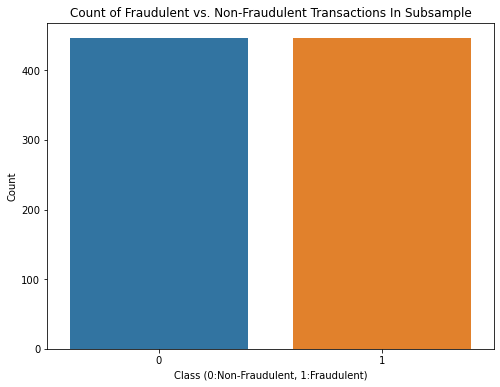

In [44]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [45]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.417053
V2             0.475310
V3            -0.568677
V4             0.707611
V5            -0.376781
V6            -0.395674
V7            -0.474763
V8             0.057323
V9            -0.558401
V10           -0.623622
V11            0.690021
V12           -0.679135
V13           -0.062925
V14           -0.753660
V15           -0.108704
V16           -0.588536
V17           -0.557583
V18           -0.456589
V19            0.223419
V20            0.146787
V21            0.140520
V22           -0.012123
V23           -0.015543
V24           -0.071047
V25            0.039488
V26            0.023146
V27            0.094703
V28            0.109240
Class          1.000000
scaled_amount  0.061370
scaled_time   -0.133157

In [46]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.568677
V9  -0.558401
V10 -0.623622
V12 -0.679135
V14 -0.753660
V16 -0.588536
V17 -0.557583

In [47]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.707611
V11    0.690021
Class  1.000000

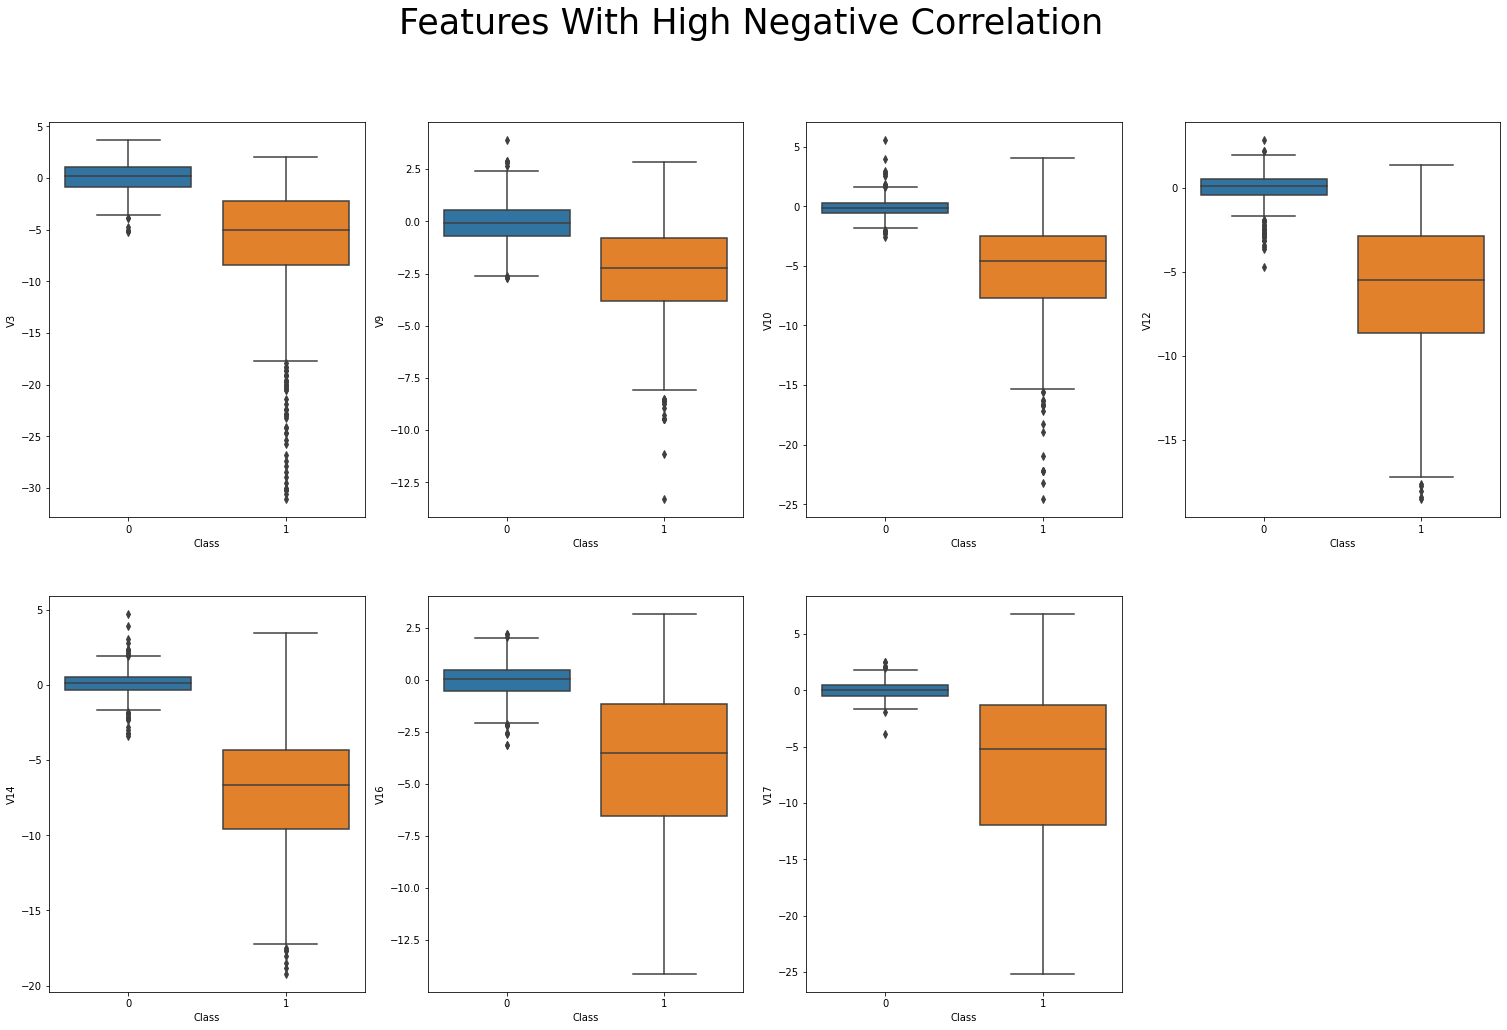

In [48]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

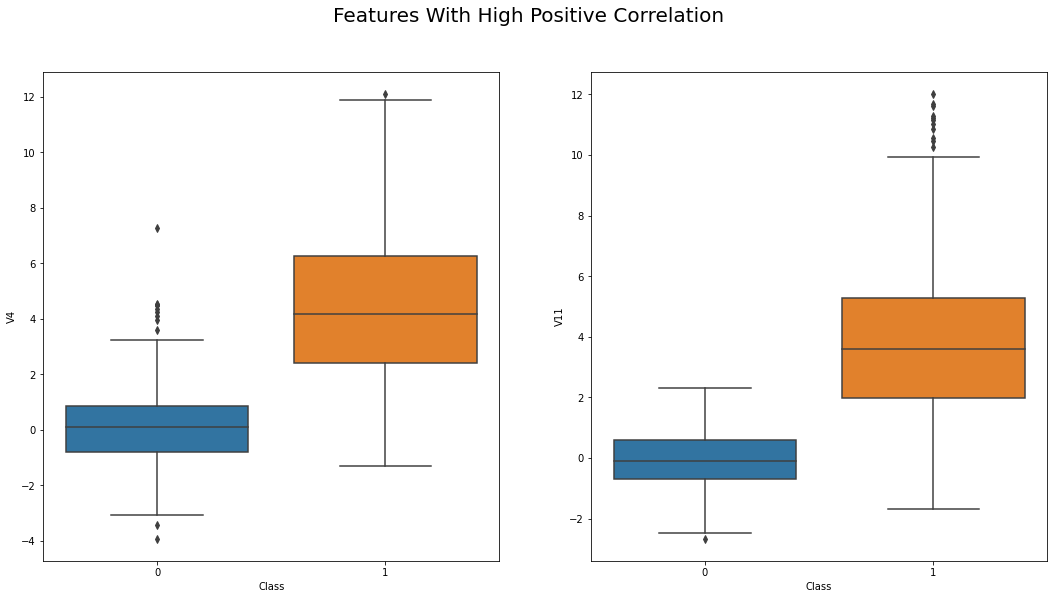

In [49]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [50]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [51]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 892 transactions by 262 transactions to 630 transactions.


In [52]:
X = df2.drop('Class', axis=1)
y = df2['Class']



In [53]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (504, 30) (126, 30) 

Y_shapes:
 Y_train: Y_validation:
 (504,) (126,)


In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [56]:
# Training and testing different models
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.963472 (0.039683)
KNN: 0.950783 (0.047156)
SVM: 0.963677 (0.043315)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.966358 (0.035933)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.961266 (0.037580)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


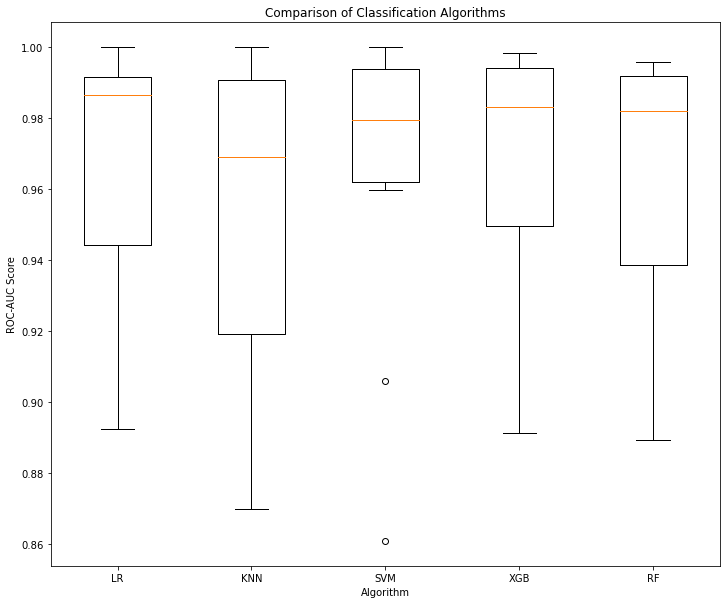

In [57]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

We choose **Random Forest** as the best model since it gives one of the best performances and higher degree of comprehensiveness .

In [58]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [59]:
y_pred = model.predict(X_validation)

In [67]:
#Testing
y_expect = pd.DataFrame(y_validation)
cm = confusion_matrix(y_expect, y_pred.round())
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9206349206349206
0.926829268292683
0.8444444444444444
0.8837209302325582


In [72]:
no_of_frauds_t = test.Class.value_counts()[1]
#randomly selecting 431 random non-fraudulent transactions
non_fraudt = test[test['Class'] == 0]
fraudt = test[test['Class'] == 1]
selectedt = non_fraudt.sample(no_of_frauds_t)
selectedt.reset_index(drop=True, inplace=True)
fraudt.reset_index(drop=True, inplace=True)
subsamplet = pd.concat([selectedt, fraudt])
len(subsamplet)
subsamplet = subsamplet.sample(frac=1).reset_index(drop=True)
subsamplet.head(10)

V1        V2        V3        V4        V5        V6        V7  \
0 -2.150855  2.187917 -3.430516  0.119476 -0.173210  0.290700 -2.808988   
1 -1.290288  1.457918  0.665972  2.972158 -1.051903  0.545823  2.175816   
2 -0.561658  0.011989  1.630066 -0.763861 -0.369060 -0.407068  0.203597   
3 -1.117630 -0.809935  2.185720 -1.297836 -1.408131 -0.394906 -0.928944   
4 -1.410852  2.268271 -2.297554  1.871331  0.248957 -1.208799 -1.358648   
5 -3.975939 -1.244939 -3.707414  4.544772  4.050676 -3.407679 -5.063118   
6 -4.617217  1.695694 -3.114372  4.328199 -1.873257 -0.989908 -4.577265   
7 -0.656879  1.299249  1.481758 -0.065456 -0.081608 -0.714281  0.486031   
8  1.132087 -1.751519 -1.454267  0.248602  0.047039  1.321104 -0.049545   
9  2.018656 -0.067284 -0.897601  0.522104 -0.363337 -1.454579  0.198154   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0 -2.679351 -0.556685 -4.485483  ...  0.561496 -0.075034 -0.437619  0.353841   
1 -0.343183 -1.919979  0.756396  ...  0.537968 -0.406803  0.711698 -0.155014   
2 -0.075008 -1.394656  0.154884  ... -0.566359 -0.183964 -0.105224  0.290707   
3  0.103153 -1.860448  1.599339  ...  0.483443  0.215604  0.350163 -0.000715   
4  1.102916 -1.317364 -4.626919  ... -0.614880 -0.196126 -0.464376  0.118473   
5  1.007042 -3.190158 -4.250717  ... -0.037395  0.348707 -0.162929  0.410531   
6  0.472216  0.472017 -5.576023  ...  0.146023  0.117039 -0.217565 -0.138776   
7 -0.887865 -0.428928 -0.262040  ... -0.800543  0.081892  0.370228 -0.152981   
8  0.285843  0.595015 -0.111986  ...  0.252445 -0.129135 -1.565874 -0.588946   
9 -0.359626  0.523188  0.071544  ... -0.631392  0.386911  0.458068 -0.359857   

        V26       V27       V28  Class  scaled_amount  scaled_time  
0 -0.521339  0.144465  0.026588      1      -0.153325     1.165012  
1  0.224650 -0.206132 -0.441836      0       0.974095    -1.121668  
2  0.850478  0.007773  0.065677      0      -0.161721     1.624538  
3  0.031915 -0.561273 -0.399726      0      -0.305252    -1.136135  
4 -0.484537  0.373596  0.187657      1      -0.349231    -0.371290  
5 -0.123612  0.877424  0.667568      1      -0.320045     0.932932  
6 -0.424453 -1.002041  0.890780      1      -0.348831    -1.811105  
7  0.075319  0.306555  0.129251      0      -0.335278    -0.717462  
8  0.607223 -0.084695 -0.012846      0       1.274032     0.510447  
9  0.169268 -0.072032 -0.054569      0      -0.317287     1.194682  

[10 rows x 31 columns]

In [75]:
#Only removing extreme outliers
Q1 = subsamplet.quantile(0.25)
Q3 = subsamplet.quantile(0.75)
IQR = Q3 - Q1

df3 = subsamplet[~((subsamplet < (Q1 - 2.5 * IQR)) |(subsamplet > (Q3 + 2.5 * IQR))).any(axis=1)]
len_aftert = len(df3)
len_beforet = len(subsamplet)
len_differencet = len(subsamplet) - len(df3)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_beforet, len_differencet, len_aftert))

We reduced our data size from 92 transactions by 26 transactions to 66 transactions.


In [77]:
X_t = df3.drop('Class', axis=1)
y_t = df3['Class']
yt_pred = model.predict(X_t)
yt_expect = pd.DataFrame(y_t)
cm = confusion_matrix(yt_expect, yt_pred.round())
print(accuracy_score(y_t, yt_pred.round()))
print(precision_score(y_t, yt_pred.round()))
print(recall_score(y_t, yt_pred.round()))
print(f1_score(y_t, yt_pred.round()))

0.9393939393939394
0.9523809523809523
0.8695652173913043
0.909090909090909
